In [45]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob

In [24]:
tf.__version__

'2.0.0-rc2'

In [25]:
train_image_path = glob.glob('E:\\study\\tensorflow\\data\\dc_2000\\train\\*\\*.jpg')

In [26]:
len(train_image_path)

2000

In [27]:
train_image_path[:5]

['E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.0.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.1.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.10.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.100.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.101.jpg']

In [28]:
train_image_path[-5:]

['E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.995.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.996.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.997.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.998.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.999.jpg']

In [29]:
p = 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.995.jpg'
p.split('\\')[-2]

'dog'

In [30]:
train_image_label = [int(p.split('\\')[-2] == 'cat') for p in train_image_path]

In [31]:
train_image_label[-5:]

[0, 0, 0, 0, 0]

In [32]:
def load_preprosess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image,[256,256])
    image = tf.cast(image, tf.float32)
    image = image/255
    label = tf.reshape(label,[1])
    return image, label

In [33]:
# tf.image.convert_image_dtype()

train_image_ds = tf.data.Dataset.from_tensor_slices((train_image_path,train_image_label))

In [34]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_image_ds = train_image_ds.map(load_preprosess_image, num_parallel_calls=AUTOTUNE)

In [35]:
train_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), (1,)), types: (tf.float32, tf.int32)>

In [36]:
BATCH_SIZE = 32
train_count = len(train_image_path)

In [37]:
train_image_ds = train_image_ds.shuffle(train_count).repeat().batch(BATCH_SIZE)
train_image_ds = train_image_ds.prefetch(AUTOTUNE)

In [38]:
imgs, labels = next(iter(train_image_ds))

In [39]:
imgs.shape

TensorShape([32, 256, 256, 3])

In [40]:
labels.shape

TensorShape([32, 1])

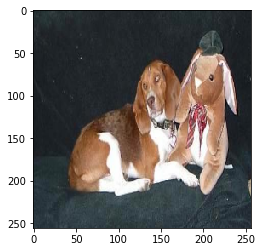

In [41]:
plt.imshow(imgs[0])

In [42]:
labels[0]

<tf.Tensor: id=232, shape=(1,), dtype=int32, numpy=array([0])>

In [43]:
# model = keras.Sequential([
#     tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(512,(3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(1024,(3,3), activation='relu'),
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(1,activation='sigmoid')
# ])

# model.summary()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [44]:
pred = model(imgs)


# model.compile(optimizer='adam',
#              loss='binary_crossentropy',
#              metrics=['acc'])

# history = model.fit(train_image_ds,epochs=30,steps_per_epoch=train_count//BATCH_SIZE)


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above. [Op:Conv2D]